W ramach swojego projektu postanowiłem bliżej przyjrzeć się ocenom jakie wystawiam obejrzanym przez siebie filmom. Analizowane dane pochodzą z mojego konta w serwisie Filmweb. Zebrane dane przedstawione są za pomocą wykresów słupkowych, kołowych, mapy kartograficznej i chmur słow. Szczegółowe dane o osobach zaangażowanych w produkcję filmów zebrano za pomocą web scrapingu.

Wczytanie danych i potrzebnych bibliotek. 

Pliki potrzebne do uruchomienia kodu:
<br>oceny.xlsx - oceny filmów
<br>mask_oscar.png, mask_clapper.png, mask_camera.png - pliki wykorzystywane przy tworzeniu chmur słów
<br>objs.pkl - dane o obsadzie filmów zebrane za pomocą  web scrapingu
<br>world_countries.json - dane kartograficzne potrzebne do przedstawienia mapy

Ze względu na długi czas działania web scrapera ten notebook korzysta z wcześniej zebranych danych. Web scraper można uruchomić po odkomentowaniu ostatniej komórki z kodem w notebooku.

In [1]:
# Ustawianie pozycji wykresów 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
# Wczytanie potrzebnych bibliotek
%reset -f
import os
os.getcwd()
# os.chdir(r'C:\Users\Michal\Desktop\Szkoła\Wstep do Pythona\Projekt')
import pandas as pd
# Wczytanie ocen
data = pd.read_excel(r'oceny.xlsx')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
import datetime
import warnings
import folium
import math
from folium.features import GeoJsonPopup, GeoJsonTooltip
from folium.plugins import MiniMap
from folium.plugins import Fullscreen
# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from os import path
from collections import Counter
from statistics import mean

# Maski do tworzenia wordcloudów
oscar_mask = np.array(Image.open("mask_oscar.png"))
clapper_mask = np.array(Image.open("mask_clapper.png"))
camera_mask = np.array(Image.open("mask_camera.png"))

from selenium import webdriver
import time

import pickle
# Wczytanie danych zebranych web scraperem:
with open('objs.pkl', 'rb') as f:
    actors, directors, screenwriters, cinematographers, composers, original_material_authors, editors, production_designers, producers, sound_designers = pickle.load(f)

plt.rcParams['figure.figsize'] = [14,9]

Pierwszy przedstawiony wykres to histogram wystawionych przez mnie ocen. Jak widać, najczęściej oglądam filmy ocenione na 7/10 czyli według nomenklatury Filmwebu filmy "dobre". Średnia wszystkich ocen to 6.28.

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


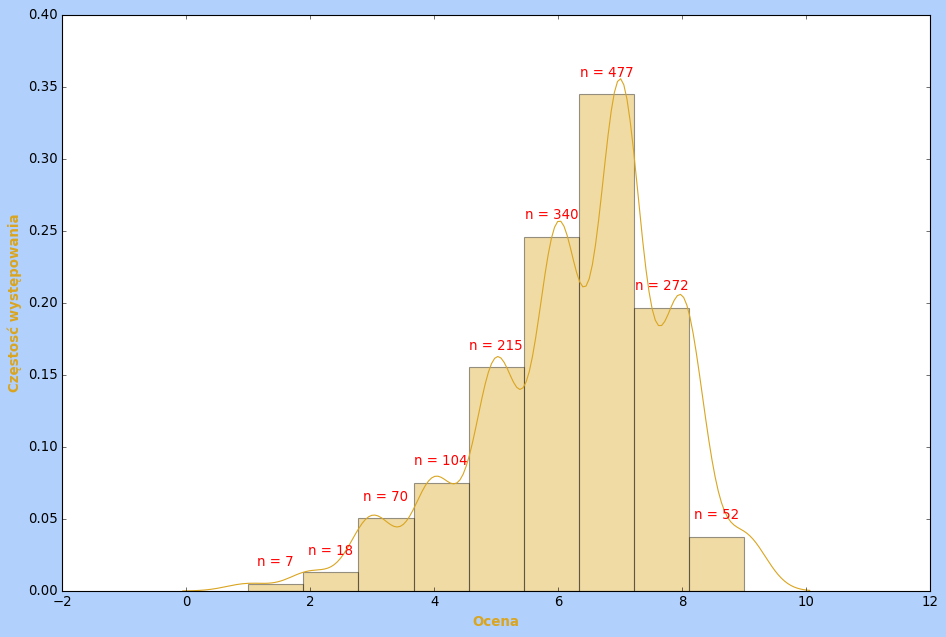

Średnia ocen to:  6.281028938906752


In [3]:
oceny = data['Ocena']

oceny1 = pd.to_numeric(oceny, errors="coerce")
oceny1 = oceny1.dropna()
fig, ax = plt.subplots()
ax = sns.distplot(oceny1, color = "goldenrod", bins = 9)

plt.xlabel("Ocena", color = "goldenrod", fontweight = "bold")
plt.ylabel("Częstosć występowania", color = "goldenrod", fontweight = "bold")

label = list()
for i in range(1, len(data.groupby('Ocena').count().ID)):
    label.append("n = " + str(data.groupby('Ocena').count().ID[i]))
 
s = 0

for p in ax.patches:
    s+= p.get_height()

i = 0
for p in ax.patches: 
    ax.text(p.get_x() + p.get_width()/2.,
            p.get_height()+0.01,
            label[i], 
            fontsize=12,
            color='red',
            ha='center',
            va='bottom')
    i+=1
    
fig.set_facecolor('xkcd:powder blue')

plt.show()

print("Średnia ocen to: ", mean(oceny1))

Przed czterema laty postawiłem sobie wyzwanie obejrzenia tysiąca filmów przez cztery lata. Wyzwanie udało mi się zrealizować minimalnie przekraczając tę liczbę.

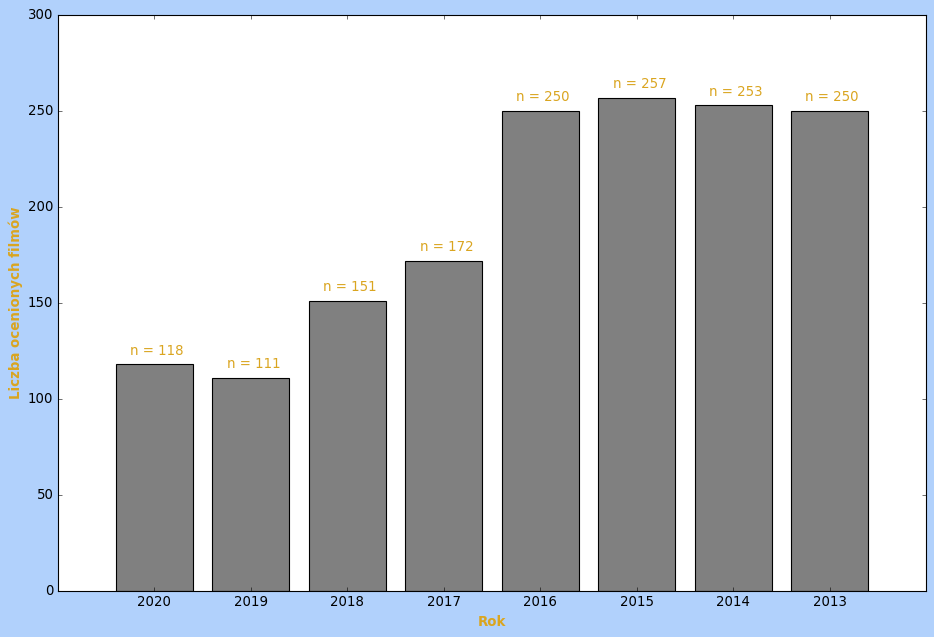

In [4]:
year = datetime.date.today().year

fig, ax = plt.subplots()
Rok = list()
for i in range(0, len(data)):
    Rok.append(data['Data'][i].date().year)

data["Rok"] = Rok

x = data.groupby('Rok').count()

height = list()
for i in range(2013, 2021):
    height.append(x['ID'][i])
    
bars = data["Rok"].unique()
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height, color="grey")
 
plt.xticks(y_pos, bars)
 
plt.xlabel("Rok", color = "goldenrod", fontweight = "bold")
plt.ylabel("Liczba ocenionych filmów", color = "goldenrod", fontweight = "bold")

label = ['n = 118', 'n = 111', 'n = 151', 'n = 172', 'n = 250', 'n = 257', 'n = 253', 'n = 250']
 
for i in range(len(y_pos)):
    plt.text(x = y_pos[i]-0.25 , y = height[i]+5, s = label[i], size = 12, color = "goldenrod")
fig.set_facecolor('xkcd:powder blue')
plt.show()

Srednią wystawionych przeze mnie ocen charakteryzowała duża zmienność w pierwszych dwóch latach korzystania z serwisu. W okresie późniejszym pozostawała ona prawie niezmieniona. 

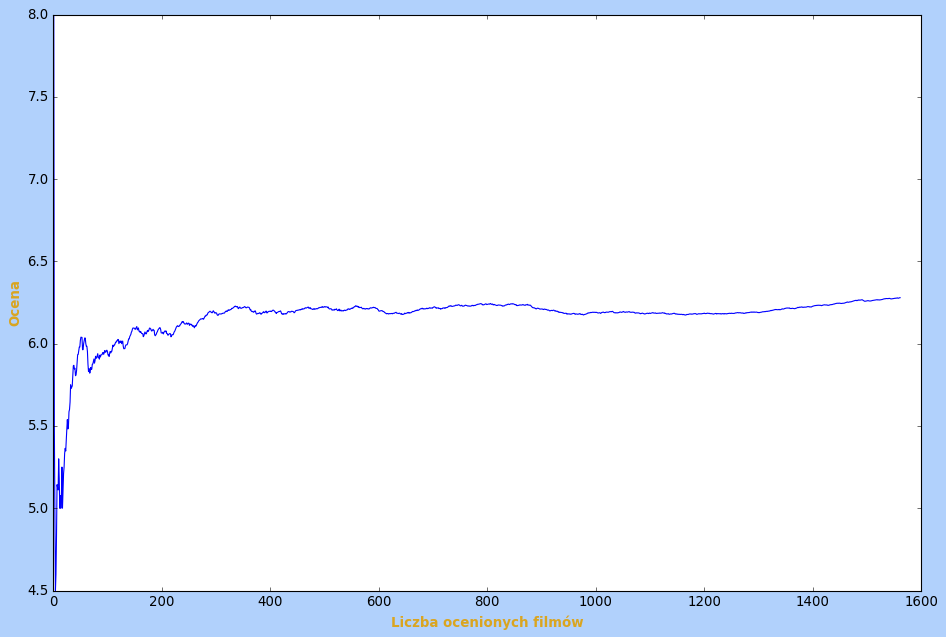

In [5]:
fig, ax = plt.subplots()
data['Ocena'] = pd.to_numeric(data['Ocena'], errors='coerce')

data['Ocena_avg'] = data.Ocena.mean()

def avg(i):
    return(data[:i]["Ocena"].mean())

x = list(range(0, len(data)))
y = list()

for i in x:
    y.append(avg(i))

ax = sns.lineplot(x = x, y = y)

plt.xlabel("Liczba ocenionych filmów", color = "goldenrod", fontweight = "bold")
plt.ylabel("Ocena", color = "goldenrod", fontweight = "bold")
fig.set_facecolor('xkcd:powder blue')
ax.set_facecolor('xkcd:white')
plt.show()

Najwyżej oceniałem filmy z lat czterdziestych ubiegłego wieku, ale filmow tych było tylko kilkanaście, wiec nie stanowią one raczej reprezentatywnej próby. Wśród liczniejszych podgrup filmów najlepiej oceniałem filmy z lat sześćdziesiątych, siedemdziesiątych i dziewięćdziesiątych. W ostatnich czterech dekadach odnotować można wyraźną tendencję spadkową średniej ocen.

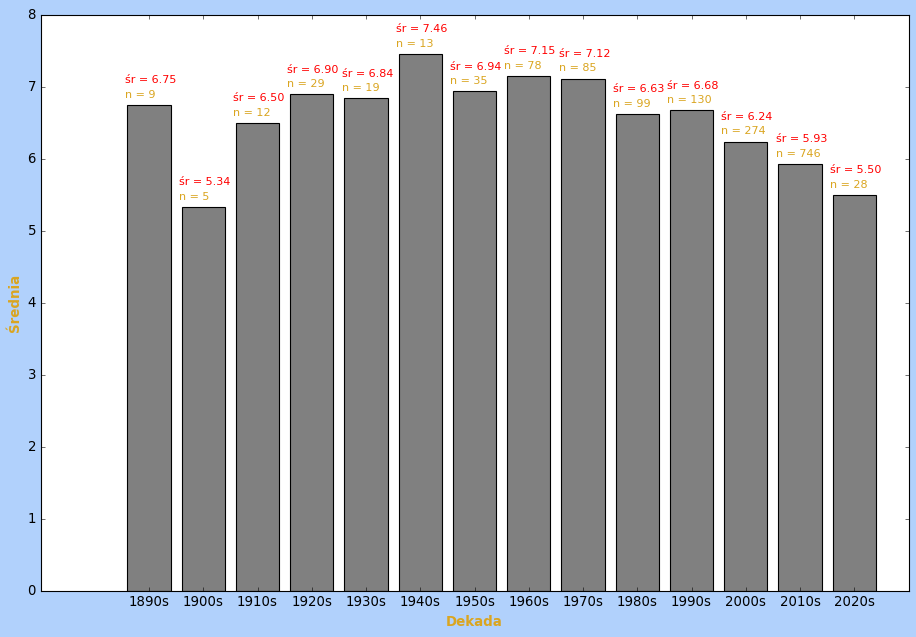

In [6]:
data = pd.read_excel(r'oceny.xlsx')

Decade = list()
#Podział filmów na dekady
for i in range(0, len(data)):
    if(1890 <= data.iloc[i]['Rok produkcji'] <= 1899):
        Decade.append("1890s")
    elif(1900 <= data.iloc[i]['Rok produkcji'] <= 1909):
        Decade.append("1900s")
    elif(1910 <= data.iloc[i]['Rok produkcji'] <= 1919):
        Decade.append("1910s")
    elif(1920 <= data.iloc[i]['Rok produkcji'] <= 1929):
        Decade.append("1920s")
    elif(1930 <= data.iloc[i]['Rok produkcji'] <= 1939):
        Decade.append("1930s")
    elif(1940 <= data.iloc[i]['Rok produkcji'] <= 1949):
        Decade.append("1940s")
    elif(1950 <= data.iloc[i]['Rok produkcji'] <= 1959):
        Decade.append("1950s")
    elif(1960 <= data.iloc[i]['Rok produkcji'] <= 1969):
        Decade.append("1960s")
    elif(1970 <= data.iloc[i]['Rok produkcji'] <= 1979):
        Decade.append("1970s")
    elif(1980 <= data.iloc[i]['Rok produkcji'] <= 1989):
        Decade.append("1980s")
    elif(1990 <= data.iloc[i]['Rok produkcji'] <= 1999):
        Decade.append("1990s")
    elif(2000 <= data.iloc[i]['Rok produkcji'] <= 2009):
        Decade.append("2000s")
    elif(2010 <= data.iloc[i]['Rok produkcji'] <= 2019):
        Decade.append("2010s")
    elif(2020 <= data.iloc[i]['Rok produkcji'] <= 2029):
        Decade.append("2020s")
    else:
        Decade.append("Brak daty")


# Po pętli dodaję dekadę do zbioru danych

data["Decade"] = Decade

oceny = data.loc[:, ["Ocena", "Decade"]].copy()

data1 = []

for s in range(len(oceny)):
    if str(oceny["Ocena"][s]).isnumeric():
        data1.append([oceny["Ocena"][s], oceny["Decade"][s]])
        
oceny1 = pd.DataFrame(data1, columns = ["Ocena", "Decade"])     
  
x = oceny1.groupby('Decade').mean()

height = list()

for i in range(0,14):
    # print(i)
    height.append(x['Ocena'][i])
    
bars = ("1890s", "1900s", "1910s", "1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s","2010s", "2020s")
y_pos = np.arange(len(bars))

fig, ax = plt.subplots()

# Tworzenie słupków
plt.bar(y_pos, height, color="grey")
 
# Tworzenie nazw na osi x
plt.xticks(y_pos, bars, size=12)
 
plt.xlabel("Dekada", color = "goldenrod", fontweight = "bold")
plt.ylabel("Średnia", color = "goldenrod", fontweight = "bold")

# Tworzenie etykiet
avg = ['śr = 6.75', 'śr = 5.34', 'śr = 6.50', 'śr = 6.90', 'śr = 6.84', 'śr = 7.46', 'śr = 6.94', 'śr = 7.15', 'śr = 7.12', 'śr = 6.63', 'śr = 6.68', 'śr = 6.24', 'śr = 5.93', 'śr = 5.50']
label = ['n = 9', 'n = 5', 'n = 12', 'n = 29', 'n = 19', 'n = 13', 'n = 35', 'n = 78', 'n = 85', 'n = 99', 'n = 130', 'n = 274', 'n = 746', 'n = 28']

for i in range(len(y_pos)):
    plt.text(x = y_pos[i]-0.45 , y = height[i] + 0.1, s = label[i], size = 10, color = "goldenrod")
    plt.text(x = y_pos[i]-0.45 , y = height[i] + 0.3, s = avg[i], size = 10, color = "red")


fig.set_facecolor('xkcd:powder blue')
ax.set_facecolor('xkcd:white')

plt.show()

Baza ocenionych filmów jest wyraźnie zdominowana przez produkcje z ostatnich trzech dekad.

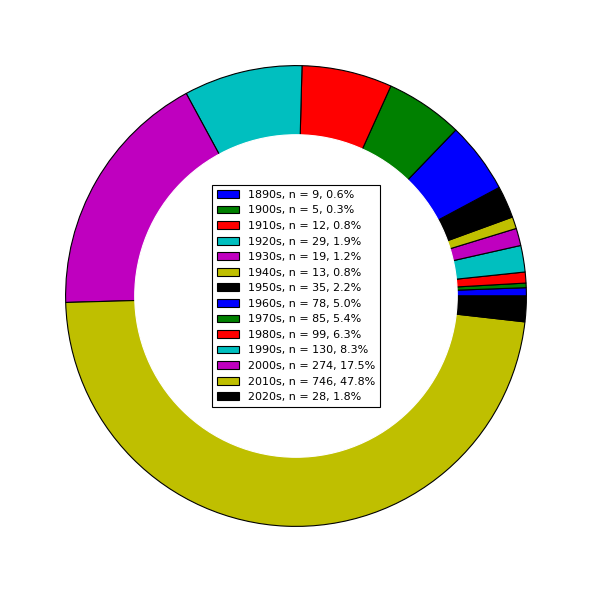

In [7]:
warnings.filterwarnings("ignore", message="You have mixed positional and keyword arguments, ")

x = data.groupby('Decade').count()

size = list()

for i in range(0,14):
    size.append(x['ID'][i])
    
names = ("1890s", "1900s", "1910s", "1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s","2010s", "2020s")

fig, ax = plt.subplots()

# Tworzenie diagramu kołowego
plt.pie(size)
 
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

sizes = [9, 5, 12, 29, 19, 13, 35, 78, 85, 99, 130, 274, 746, 28]
labels = ["n = %s" % i for i in sizes]
 
total = sum(sizes)
plt.legend(names,labels=['%s, %s, %1.1f%%' % (n, l, (float(s) / total) * 100)
            for n, l, s in zip(names, labels, sizes)], loc="center", fontsize='small')

fig.set_facecolor('xkcd:white')
ax.set_facecolor('xkcd:white')

plt.show()

Zaprezentowana mapa kartograficzna pokazuje, że zdecydowanie najwięcej obejrzanych przeze mnie filmów jest produkcji amerykańskiej. Drugą pozycję zajmują filmy z Wielkiej Brytanii, a dalsze miejsca zajmują filmy polskie i francuskie. Niestety, na mapie pozostaje jeszcze sporo czarnych plam. Największe zaległości w oglądaniu filmów mam w krajach afrykańskich i w Azji Środkowej.

In [8]:
country = list()
allcountries = list()
for i in range(len(data)):
    if(type(data['Kraj produkcji'][i]) == str):
        country.append(data['Kraj produkcji'][i])
        splitcountries = data['Kraj produkcji'][i].split(', ')
        for j in range(len(splitcountries)):
            allcountries.append(splitcountries[j])
        
myset = sorted(set(allcountries))

# ['Argentyna', 'Australia', 'Austria', 'Bahamy', 'Belgia', 'Białoruś', 'Bośnia i Hercegowina', 'Brazylia', 
#  'Bułgaria', 'Chile', 'Chiny', 'Chorwacja', 'Czechosłowacja***', 'Czechy', 'Dania', 'Fed. Rep. Jugosławii***', 
#  'Filipiny', 'Finlandia', 'Francja', 'Grecja', 'Hiszpania', 'Holandia', 'Hongkong***', 'Indie', 'Indonezja', 
#  'Iran', 'Irlandia', 'Islandia', 'Japonia', 'Jugosławia', 'Kanada', 'Korea Południowa', 'Kuba', 'Macedonia', 
#  'Malezja', 'Malta', 'Maroko', 'Meksyk', 'Niemcy', 'Norwegia', 'Nowa Zelandia', 'Peru', 'Polska', 'Portugalia', 
#  'RFN***', 'RPA', 'Rosja', 'Rumunia', 'Samoa***', 'Singapur***', 'Szwajcaria', 'Szwecja', 'Słowenia', 'Tajlandia', 
#  'Tajwan', 'USA', 'Ukraina', 'Wielka Brytania', 'Wietnam', 'Węgry', 'Włochy', 'ZSRR***', 
#  'Zjednoczone Emiraty Arabskie', 'Łotwa']


# Tworzenie listy częstosci ogladania filmów z danego kraju

countries_freq = {'Country': ['Argentina', 'Australia', 'Austria', 'The Bahamas', 'Belgium', 'Belarus', 
                                 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Chile', 'China', 
                                 'Croatia', 'Czechosłowacja***', 'Czech Republic', 'Denmark', 'Fed. Rep. Jugosławii***', 
                                 'Philippines', 'Finland', 'France', 'Greece', 'Spain', 'Netherlands', 
                                 'Hongkong***', 'India', 'Indonesia', 'Iran', 'Ireland', 'Iceland', 'Japan', 
                                 'Jugosławia', 'Canada', 'South Korea', 'Cuba', 'Macedonia', 'Malaysia', 
                                 'Malta', 'Morocco', 'Mexico', 'Germany', 'Norway', 'New Zealand', 'Peru', 
                                 'Poland', 'Portugal', 'RFN***', 'South Africa', 'Russia', 'Romania', 'Samoa***', 'Singapore***', 
                                 'Switzerland', 'Sweden', 'Slovenia', 'Thailand', 'Taiwan', 'United States of America', 'Ukraine', 
                                 'United Kingdom', 'Vietnam', 'Hungary', 'Italy', 'ZSRR***', 
                                 'United Arab Emirates', 'Latvia'],
        'Number of films': [0]*64
        }

film_geo = pd.DataFrame(countries_freq, columns = ["Country", "Number of films"])

for i in range(len(allcountries)):
    if (allcountries[i] == "Argentyna"):
        film_geo.loc[film_geo.Country == 'Argentina', "Number of films"] +=1
    if (allcountries[i] == "Australia"):
        film_geo.loc[film_geo.Country == 'Australia', "Number of films"] +=1
    if (allcountries[i] == "Austria"):
        film_geo.loc[film_geo.Country == 'Austria', "Number of films"] +=1        
    if (allcountries[i] == "Bahamy"):
        film_geo.loc[film_geo.Country == 'The Bahamas', "Number of films"] +=1         
    if (allcountries[i] == "Belgia"):
        film_geo.loc[film_geo.Country == 'Belgium', "Number of films"] +=1 
    if (allcountries[i] == "Białoruś"):
        film_geo.loc[film_geo.Country == 'Belarus', "Number of films"] +=1     
    if (allcountries[i] == "Bośnia i Hercegowina"):
        film_geo.loc[film_geo.Country == 'Bosnia and Herzegovina', "Number of films"] +=1
    if (allcountries[i] == "Brazylia"):
        film_geo.loc[film_geo.Country == 'Brazil', "Number of films"] +=1        
    if (allcountries[i] == "Bułgaria"):
        film_geo.loc[film_geo.Country == 'Bulgaria', "Number of films"] +=1         
    if (allcountries[i] == "Chile"):
        film_geo.loc[film_geo.Country == 'Chile', "Number of films"] +=1 
    if (allcountries[i] == "Chiny"):
        film_geo.loc[film_geo.Country == 'China', "Number of films"] +=1     
    if (allcountries[i] == "Chorwacja"):
        film_geo.loc[film_geo.Country == 'Croatia', "Number of films"] +=1
    if (allcountries[i] == "Czechosłowacja"):
        film_geo.loc[film_geo.Country == 'Czech Republic', "Number of films"] +=1        
    if (allcountries[i] == "Czechy"):
        film_geo.loc[film_geo.Country == 'Czech Republic', "Number of films"] +=1         
    if (allcountries[i] == "Dania"):
        film_geo.loc[film_geo.Country == 'Denmark', "Number of films"] +=1 
    if (allcountries[i] == "Fed. Rep. Jugosławii"):
        film_geo.loc[film_geo.Country == 'Fed. Rep. Jugosławii***', "Number of films"] +=1     
    if (allcountries[i] == "Filipiny"):
        film_geo.loc[film_geo.Country == 'Philippines', "Number of films"] +=1
    if (allcountries[i] == "Finlandia"):
        film_geo.loc[film_geo.Country == 'Finland', "Number of films"] +=1        
    if (allcountries[i] == "Francja"):
        film_geo.loc[film_geo.Country == 'France', "Number of films"] +=1         
    if (allcountries[i] == "Grecja"):
        film_geo.loc[film_geo.Country == 'Greece', "Number of films"] +=1 
    if (allcountries[i] == "Hiszpania"):
        film_geo.loc[film_geo.Country == 'Spain', "Number of films"] +=1     
    if (allcountries[i] == "Holandia"):
        film_geo.loc[film_geo.Country == 'Netherlands', "Number of films"] +=1
    if (allcountries[i] == "Hongkong"):
        film_geo.loc[film_geo.Country == 'China', "Number of films"] +=1        
    if (allcountries[i] == "Indie"):
        film_geo.loc[film_geo.Country == 'India', "Number of films"] +=1         
    if (allcountries[i] == "Indonezja"):
        film_geo.loc[film_geo.Country == 'Indonesia', "Number of films"] +=1 
    if (allcountries[i] == "Malezja"):
        film_geo.loc[film_geo.Country == 'Malaysia', "Number of films"] +=1     
    if (allcountries[i] == "Malta"):
        film_geo.loc[film_geo.Country == 'Malta', "Number of films"] +=1
    if (allcountries[i] == "Maroko"):
        film_geo.loc[film_geo.Country == 'Morocco', "Number of films"] +=1        
    if (allcountries[i] == "Meksyk"):
        film_geo.loc[film_geo.Country == 'Mexico', "Number of films"] +=1         
    if (allcountries[i] == "Niemcy"):
        film_geo.loc[film_geo.Country == 'Germany', "Number of films"] +=1 
    if (allcountries[i] == "Norwegia"):
        film_geo.loc[film_geo.Country == 'Norway', "Number of films"] +=1     
    if (allcountries[i] == "Nowa Zelandia"):
        film_geo.loc[film_geo.Country == 'New Zealand', "Number of films"] +=1
    if (allcountries[i] == "Peru"):
        film_geo.loc[film_geo.Country == 'Peru', "Number of films"] +=1 
    if (allcountries[i] == "Polska"):
        film_geo.loc[film_geo.Country == 'Poland', "Number of films"] +=1     
    if (allcountries[i] == "Portugalia"):
        film_geo.loc[film_geo.Country == 'Portugal', "Number of films"] +=1
    if (allcountries[i] == "RFN"):
        film_geo.loc[film_geo.Country == 'Germany', "Number of films"] +=1 
    if (allcountries[i] == "RPA"):
        film_geo.loc[film_geo.Country == 'South Africa', "Number of films"] +=1     
    if (allcountries[i] == "Rosja"):
        film_geo.loc[film_geo.Country == 'Russia', "Number of films"] +=1
    if (allcountries[i] == "Rumunia"):
        film_geo.loc[film_geo.Country == 'Romania', "Number of films"] +=1 
    if (allcountries[i] == "Samoa"):
        film_geo.loc[film_geo.Country == 'Samoa***', "Number of films"] +=1     
    if (allcountries[i] == "Singapur"):
        film_geo.loc[film_geo.Country == 'Malaysia', "Number of films"] +=1
    if (allcountries[i] == "Szwajcaria"):
        film_geo.loc[film_geo.Country == 'Switzerland', "Number of films"] +=1 
    if (allcountries[i] == "Szwecja"):
        film_geo.loc[film_geo.Country == 'Sweden', "Number of films"] +=1     
    if (allcountries[i] == "Słowenia"):
        film_geo.loc[film_geo.Country == 'Slovenia', "Number of films"] +=1
    if (allcountries[i] == "Tajlandia"):
        film_geo.loc[film_geo.Country == 'Thailand', "Number of films"] +=1 
    if (allcountries[i] == "Tajwan"):
        film_geo.loc[film_geo.Country == 'Taiwan', "Number of films"] +=1     
    if (allcountries[i] == "USA"):
        film_geo.loc[film_geo.Country == 'United States of America', "Number of films"] +=1
    if (allcountries[i] == "Ukraina"):
        film_geo.loc[film_geo.Country == 'Ukraine', "Number of films"] +=1 
    if (allcountries[i] == "Wielka Brytania"):
        film_geo.loc[film_geo.Country == 'United Kingdom', "Number of films"] +=1     
    if (allcountries[i] == "Wietnam"):
        film_geo.loc[film_geo.Country == 'Vietnam', "Number of films"] +=1
    if (allcountries[i] == "Węgry"):
        film_geo.loc[film_geo.Country == 'Hungary', "Number of films"] +=1 
    if (allcountries[i] == "Włochy"):
        film_geo.loc[film_geo.Country == 'Italy', "Number of films"] +=1     
    if (allcountries[i] == "ZSRR"):
        film_geo.loc[film_geo.Country == 'Russia', "Number of films"] +=1
    if (allcountries[i] == "Zjednoczone Emiraty Arabskie"):
        film_geo.loc[film_geo.Country == 'United Arab Emirates', "Number of films"] +=1 
    if (allcountries[i] == "Łotwa"):
        film_geo.loc[film_geo.Country == 'Latvia', "Number of films"] +=1     


# Wczytanie pliku JSON z danymi kartograficznymi
state_geo = os.path.join('world-countries.json')
 

# Utworzenie mapy
m = folium.Map(location=[52, 20], zoom_start=5, min_zoom=3, max_bounds=True)
 
# Wybór palety kolorów
choropleth = folium.Choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=film_geo,
 columns=['Country', 'Number of films'],
 key_on='feature.properties.name',
 fill_color='YlOrRd',
 bins = list(film_geo["Number of films"].quantile([0, 0.9, 0.95, 0.975, 0.99, 0.995, 1])),
 fill_opacity=0.7,
 line_opacity=0.2,
 highlight= True,
 legend_name='Number of films'
).add_to(m)

# Tooltipy wyświetlające się po najechaniu myszką
tooltip = GeoJsonTooltip(
    fields=["name"],
    aliases=["Country"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)

g = folium.GeoJson(
    state_geo,
    style_function = lambda x:{
        'color': 'black',
        'stroke' : 'false',
        'opacity' : 0,
        'fillOpacity' : 0
    },
    tooltip=tooltip
).add_to(m)


# Dodanie minimapy
minimap = MiniMap()
m.add_child(minimap)

# Dodanie przycisku fullscreen
Fullscreen(
    position="topright",
    title="Tryb pełnoekranowy",
    title_cancel="Wyjdź z trybu pełnoekranowego",
    force_separate_button=True,
).add_to(m)

folium.LayerControl().add_to(m)
# Wywołanie mapy
m  

Na potrzeby ostatniego etapu analizy zebrałem dane o aktorach, reżyserach i scenarzystach zaangażowanych w tworzenie ocenionych filmów. Wykorzystałem do tego webscraper Selenium. Rozmiar nazwiska osoby odpowiada częstości jej wystepowania w ocenionych filmach.

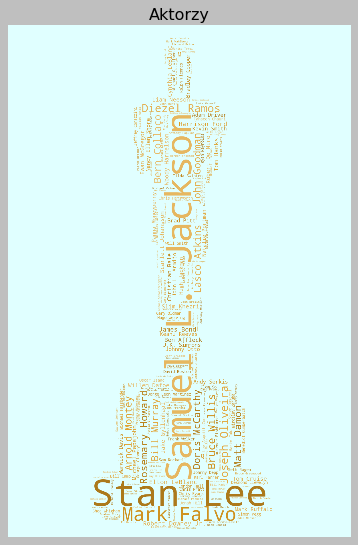

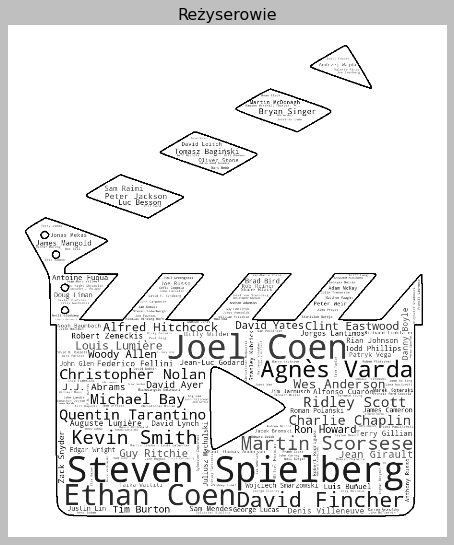

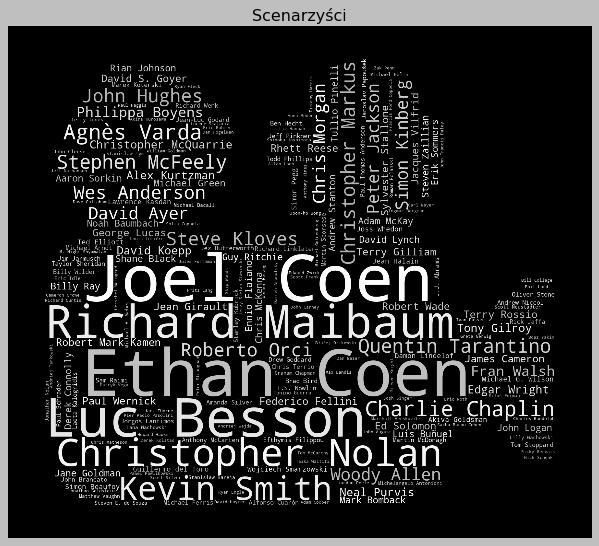

In [9]:
# Wordcloud aktorów

# Przerabianie aktorów z listy list na płaską listę do użycia w wordcloud

flat_list_actors = []
for sublist in actors:
    for item in sublist:
        flat_list_actors.append(item)
        

def random_color_func2(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 28.0 / 255.0)
    s = int(100.0 * 188.0 / 255.0)
    l = int(100.0 * float(random_state.randint(100, 170)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

word_could_dict=Counter(flat_list_actors)
wordcloud = WordCloud(mask = oscar_mask, background_color = "lightcyan", 
                      color_func = random_color_func2, contour_width = 0
                      ).generate_from_frequencies(word_could_dict)


plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title(label = "Aktorzy")
plt.show()
plt.close()

# Wordcloud reżyserów

flat_list_directors = []
for sublist in directors:
    for item in sublist:
        flat_list_directors.append(item)
        
def random_color_func2(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 0.0 / 255.0)
    s = int(100.0 * 0.0 / 255.0)
    l = int(100.0 * float(random_state.randint(0, 90)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

word_could_dict=Counter(flat_list_directors)
wordcloud = WordCloud(mask = clapper_mask, background_color = "white", 
                      color_func = random_color_func2, contour_width = 3
                      ).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title(label = "Reżyserowie")
plt.show()
plt.close()

# Wordcloud scenarzystów

flat_list_screenwriters = []
for sublist in screenwriters:
    for item in sublist:
        flat_list_screenwriters.append(item)

def random_color_func3(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 0.0 / 255.0)
    s = int(100.0 * 0.0 / 255.0)
    l = int(100.0 * float(random_state.randint(180, 255)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

word_could_dict=Counter(flat_list_screenwriters)
wordcloud = WordCloud(mask = camera_mask, background_color = "black", contour_width = 1, 
                      contour_color = 'black', color_func = random_color_func3
                      ).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title(label = "Scenarzyści")
plt.show()
plt.close()


Kod web scrapera wykorzystujacego bibliotekę Selenium.

In [10]:
# browser = webdriver.Chrome()

# actors = [] # lista list [[Adam Driver, Daisy Ridley], [Harrison Ford], ...]
# directors = []
# screenwriters = []
# cinematographers = []
# composers = []
# original_material_authors = []
# editors = []
# production_designers = []
# producers = []
# sound_designers = []

# for i in range(len(data['Tytuł polski'])):
    
#     print("Nr filmu: ", i)
#     print(str(data['Tytuł polski'][i]).upper())
    
#     # Aktorzy

#     url1 ="https://www.filmweb.pl/film/" + str(data['Tytuł polski'][i]).replace(" ", "+").replace("!", "").replace("?", "").replace("#", "")
#     url2 = "-" + str(data['Rok produkcji'][i]) + "-" + str(data['ID'][i]) + "/cast/actors"
#     url = url1 + url2 # zakładka z aktorami
#     print(url)
    
#     browser.get(url)

#     results = browser.find_elements_by_xpath("//div[@class='castRoleListElement__info']//a")
#     filmactors =[]
#     for j in range(len(results)):
#         filmactors.append(results[j].text)
#     print("Aktorzy: ")
#     print(filmactors)
#     actors.append(filmactors)
    
#     url = url.replace("/cast/actors", "/cast/crew") # Przejscie do zakładki z twórcami
#     print(url)
#     browser.get(url)
    
#     # Reżyser
  
#     results = browser.find_elements_by_xpath("//h3[@id='director']/following-sibling::div[@class='filmFullCastSection__list'][1]//div[@class='castRoleListElement__info']//a")
#     filmdirectors = []
#     for j in range(len(results)):
#         filmdirectors.append(results[j].text)
                             
#     print("Reżyser: ")
#     print(filmdirectors)
#     directors.append(filmdirectors)
    
#     # Scenarzysta

#     results = browser.find_elements_by_xpath("//h3[@id='screenwriter']/following-sibling::div[@class='filmFullCastSection__list'][1]//div[@class='castRoleListElement__info']//a")
#     filmscreenwriters = []
#     for j in range(len(results)):
#         filmscreenwriters.append(results[j].text)
#     print("Scenarzysta: ")
#     print(filmscreenwriters)
#     screenwriters.append(filmscreenwriters)
    
#     # Zdjęcia
    
#     results = browser.find_elements_by_xpath("//h3[@id='cinematographer']/following-sibling::div[@class='filmFullCastSection__list'][1]//div[@class='castRoleListElement__info']//a")
#     filmcinematographers = []
#     for j in range(len(results)):
#         filmcinematographers.append(results[j].text)
#     print("Zdjęcia: ")
#     print(filmcinematographers)
#     cinematographers.append(filmcinematographers)
    
#     # Muzyka
    
#     results = browser.find_elements_by_xpath("//h3[@id='music']/following-sibling::div[@class='filmFullCastSection__list'][1]//div[@class='castRoleListElement__info']//a")
#     filmcomposers = []
#     for j in range(len(results)):
#         filmcomposers.append(results[j].text)
#     print("Muzyka: ")
#     print(filmcomposers)
#     composers.append(filmcomposers)
    
#     # Materiały do scenariusza
    
#     results = browser.find_elements_by_xpath("//h3[@id='originalMaterials']/following-sibling::div[@class='filmFullCastSection__list'][1]//div[@class='castRoleListElement__info']//a")
#     filmoriginal_material_authors = []
#     for j in range(len(results)):
#         filmoriginal_material_authors.append(results[j].text)
#     print("Materiały do scenariusza: ")
#     print(filmoriginal_material_authors)
#     original_material_authors.append(filmoriginal_material_authors)
    
#     # Montaż
    
#     results = browser.find_elements_by_xpath("//h3[@id='montage']/following-sibling::div[@class='filmFullCastSection__list'][1]//div[@class='castRoleListElement__info']//a")
#     filmeditors = []
#     for j in range(len(results)):
#         filmeditors.append(results[j].text)
#     print("Montaż: ")
#     print(filmeditors)
#     editors.append(filmeditors)
    
#     # Scenografia
    
#     results = browser.find_elements_by_xpath("//h3[@id='productionDesigner']/following-sibling::div[@class='filmFullCastSection__list'][1]//div[@class='castRoleListElement__info']//a")
#     filmproduction_designers = []
#     for j in range(len(results)):
#         filmproduction_designers.append(results[j].text)
#     print("Scenografia: ")
#     print(filmproduction_designers)
#     production_designers.append(filmproduction_designers)
    
#     # Produkcja
    
#     results = browser.find_elements_by_xpath("//h3[@id='producer']/following-sibling::div[@class='filmFullCastSection__list'][1]//div[@class='castRoleListElement__info']//a")
#     filmproducers = []
#     for j in range(len(results)):
#         filmproducers.append(results[j].text)
#     print("Produkcja: ")
#     print(filmproducers)
#     producers.append(filmproducers)
    
#     # Dźwięk
    
#     results = browser.find_elements_by_xpath("//h3[@id='sound']/following-sibling::div[@class='filmFullCastSection__list'][1]//div[@class='castRoleListElement__info']//a")
#     filmsound_designers = []
#     for j in range(len(results)):
#         filmsound_designers.append(results[j].text)
#     print("Dźwięk: ")
#     print(filmsound_designers)
#     sound_designers.append(filmsound_designers)




# # # Zapisywanie danych
# # with open('C:\\Users\Michal\\Desktop\\Szkoła\\Wstep do Pythona\\new_objs.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
# #     pickle.dump([actors, directors, screenwriters, cinematographers, composers, original_material_authors, editors, production_designers, producers, sound_designers], f)


# browser.close()